In [0]:
from google.colab import files
files=files.upload()

Saving COALINDIA.csv to COALINDIA (1).csv


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
plt.style.use('fivethirtyeight')

In [0]:
stock = pd.read_csv("COALINDIA.csv")

In [33]:
stock

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2010-11-04,COALINDIA,EQ,245.00,291.00,344.90,291.00,342.00,342.55,327.29,479716245,1.570040e+16,NaN,187584905,0.3910
1,2010-11-05,COALINDIA,EQ,342.55,343.00,356.50,343.00,348.30,349.85,349.78,31927173,1.116747e+15,NaN,10894509,0.3412
2,2010-11-08,COALINDIA,EQ,349.85,351.80,355.90,329.50,331.40,330.75,335.19,46932779,1.573118e+15,NaN,16651623,0.3548
3,2010-11-09,COALINDIA,EQ,330.75,330.15,333.40,325.00,325.40,326.05,327.75,23741956,7.781383e+14,NaN,12977359,0.5466
4,2010-11-10,COALINDIA,EQ,326.05,325.40,327.80,320.05,321.30,322.80,323.78,21057129,6.817982e+14,NaN,6280335,0.2983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2346,2020-04-24,COALINDIA,EQ,140.90,140.60,143.80,135.80,137.25,137.00,140.11,11701225,1.639472e+14,74521.0,5377305,0.4596
2347,2020-04-27,COALINDIA,EQ,137.00,139.00,139.70,137.50,138.20,138.10,138.39,4238903,5.866294e+13,33953.0,1522577,0.3592
2348,2020-04-28,COALINDIA,EQ,138.10,138.60,139.55,134.45,135.35,135.40,136.52,7064485,9.644210e+13,58250.0,3794832,0.5372
2349,2020-04-29,COALINDIA,EQ,135.40,135.50,140.85,135.35,140.00,139.85,138.89,7399371,1.027691e+14,57807.0,2503769,0.3384


In [34]:
stock.drop(columns=['Symbol','Series','Last','VWAP','Turnover','Trades','Deliverable Volume','%Deliverble'])
stock

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2010-11-04,COALINDIA,EQ,245.00,291.00,344.90,291.00,342.00,342.55,327.29,479716245,1.570040e+16,NaN,187584905,0.3910
1,2010-11-05,COALINDIA,EQ,342.55,343.00,356.50,343.00,348.30,349.85,349.78,31927173,1.116747e+15,NaN,10894509,0.3412
2,2010-11-08,COALINDIA,EQ,349.85,351.80,355.90,329.50,331.40,330.75,335.19,46932779,1.573118e+15,NaN,16651623,0.3548
3,2010-11-09,COALINDIA,EQ,330.75,330.15,333.40,325.00,325.40,326.05,327.75,23741956,7.781383e+14,NaN,12977359,0.5466
4,2010-11-10,COALINDIA,EQ,326.05,325.40,327.80,320.05,321.30,322.80,323.78,21057129,6.817982e+14,NaN,6280335,0.2983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2346,2020-04-24,COALINDIA,EQ,140.90,140.60,143.80,135.80,137.25,137.00,140.11,11701225,1.639472e+14,74521.0,5377305,0.4596
2347,2020-04-27,COALINDIA,EQ,137.00,139.00,139.70,137.50,138.20,138.10,138.39,4238903,5.866294e+13,33953.0,1522577,0.3592
2348,2020-04-28,COALINDIA,EQ,138.10,138.60,139.55,134.45,135.35,135.40,136.52,7064485,9.644210e+13,58250.0,3794832,0.5372
2349,2020-04-29,COALINDIA,EQ,135.40,135.50,140.85,135.35,140.00,139.85,138.89,7399371,1.027691e+14,57807.0,2503769,0.3384


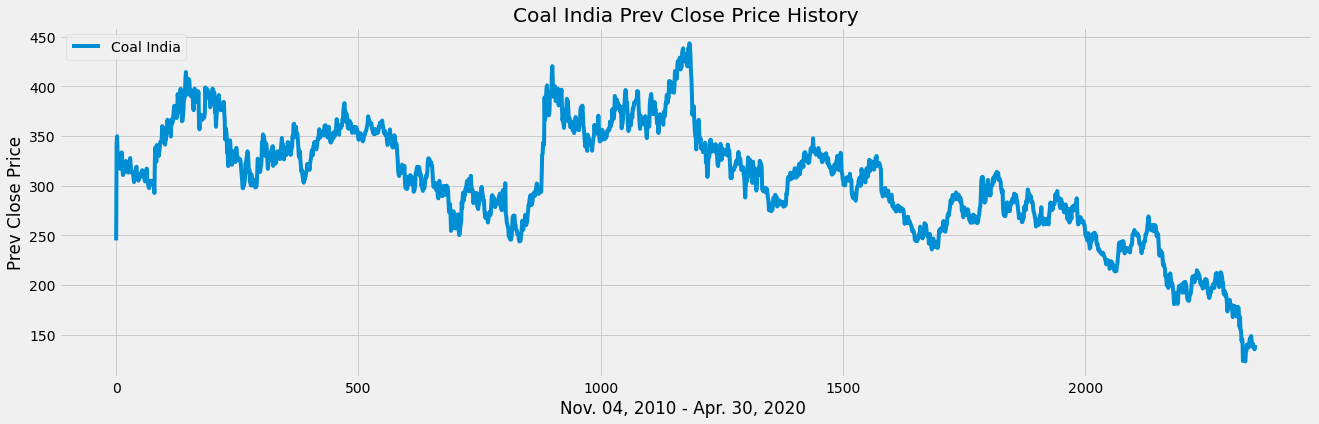

In [35]:
#Visualize the Data
plt.figure(figsize=(20,6))
plt.plot(stock['Prev Close'],label = 'Coal India')
plt.title('Coal India Prev Close Price History')
plt.xlabel('Nov. 04, 2010 - Apr. 30, 2020 ')
plt.ylabel('Prev Close Price')
plt.legend(loc='upper left')
plt.show()


In [36]:
#Creating Simple Moving Average with 30-day Window
Sma30=pd.DataFrame()
Sma30['Prev Close Price']=stock['Prev Close'].rolling(window=30).mean()
Sma30

,Prev Close Price
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2346,141.736667
2347,140.678333
2348,140.016667
2349,138.930000


In [37]:
#Creating Simple Moving Average with 100-day Window
Sma100=pd.DataFrame()
Sma100['Prev Close Price']=stock['Prev Close'].rolling(window=100).mean()
Sma100

,Prev Close Price
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2346,176.8040
2347,176.1155
2348,175.4440
2349,174.7395


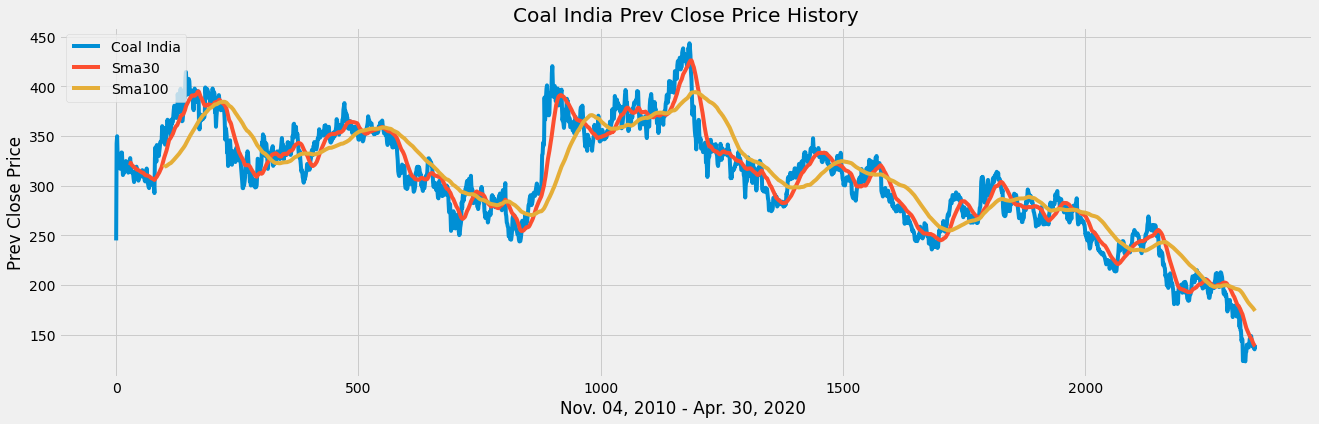

In [38]:
#Visualize the Data
plt.figure(figsize=(20,6))
plt.plot(stock['Prev Close'],label = 'Coal India')
plt.plot(Sma30['Prev Close Price'],label = 'Sma30')
plt.plot(Sma100['Prev Close Price'],label = 'Sma100')
plt.title('Coal India Prev Close Price History')
plt.xlabel('Nov. 04, 2010 - Apr. 30, 2020 ')
plt.ylabel('Prev Close Price')
plt.legend(loc='upper left')
plt.show()


In [39]:
#Creating a new dataframe to store all data
data=pd.DataFrame()
data['stock']=stock['Prev Close']
data['Sma30']=Sma30['Prev Close Price']
data['Sma100']=Sma100['Prev Close Price']
data

,stock,Sma30,Sma100
0,245.00,NaN,NaN
1,342.55,NaN,NaN
2,349.85,NaN,NaN
3,330.75,NaN,NaN
4,326.05,NaN,NaN
...,...,...,...
2346,140.90,141.736667,176.8040
2347,137.00,140.678333,176.1155
2348,138.10,140.016667,175.4440
2349,135.40,138.930000,174.7395


In [0]:
#Creating a function to signal when to buy or sell
def buy_sell(data):
  sigPriceBuy=[]
  sigPriceSell=[]
  flag=-1


  for i in range(len(data)):
    if data['Sma30'][i]>data['Sma100'][i]:
      if flag != 1:
        sigPriceBuy.append(data['stock'][i])
        sigPriceSell.append(np.nan)
        flag=1
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    elif data['Sma30'][i]<data['Sma100'][i]:
      if flag != 0 :
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(data['stock'][i])
        flag = 0
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    else:
      sigPriceBuy.append(np.nan)
      sigPriceSell.append(np.nan)


  return(sigPriceBuy,sigPriceSell)
                    


In [0]:
#Storing Buy and Sell into a variable
buy_sell = buy_sell(data)
data['Buy_Signal_Price']=buy_sell[0]
data['Sell_Signal_Price']=buy_sell[1]

In [42]:
data

,stock,Sma30,Sma100,Buy_Signal_Price,Sell_Signal_Price
0,245.00,NaN,NaN,NaN,NaN
1,342.55,NaN,NaN,NaN,NaN
2,349.85,NaN,NaN,NaN,NaN
3,330.75,NaN,NaN,NaN,NaN
4,326.05,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2346,140.90,141.736667,176.8040,NaN,NaN
2347,137.00,140.678333,176.1155,NaN,NaN
2348,138.10,140.016667,175.4440,NaN,NaN
2349,135.40,138.930000,174.7395,NaN,NaN


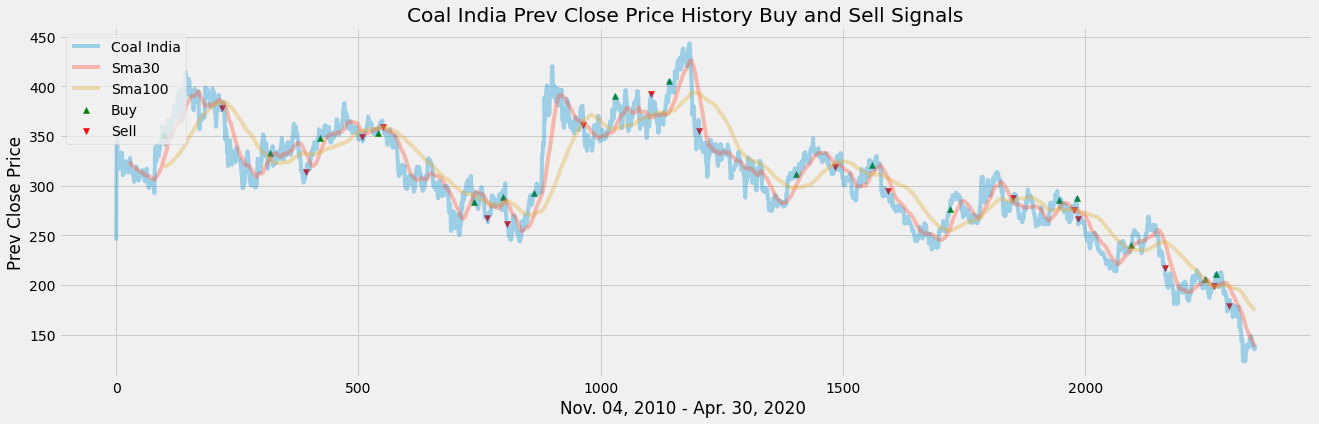

In [43]:
#Visualize the Data
plt.figure(figsize=(20,6))
plt.plot(stock['Prev Close'],label = 'Coal India',alpha=0.35)
plt.plot(Sma30['Prev Close Price'],label = 'Sma30' ,alpha=0.35)
plt.plot(Sma100['Prev Close Price'],label = 'Sma100' ,alpha=0.35)
plt.scatter(data.index,data['Buy_Signal_Price'],label='Buy',marker='^',color='green')
plt.scatter(data.index,data['Sell_Signal_Price'],label='Sell',marker='v',color='red')
plt.title('Coal India Prev Close Price History Buy and Sell Signals')
plt.xlabel('Nov. 04, 2010 - Apr. 30, 2020 ')
plt.ylabel('Prev Close Price')
plt.legend(loc='upper left')
plt.show()